Before filtering:
 - Number of rows: 5110
 - Number of columns: 12
 - Total number of cells: 61320

Dropping Entries:
Number of NaN entries in 'bmi' before filtering: 201
Number of NaN entries in 'bmi' after filtering: 0
Number of 'Unknown' smoking_status entries before filtering: 1544
Number of 'Unknown' smoking_status entries after filtering: 0

 Dropping id column

After filtering:
 - Number of rows: 3426
 - Number of columns: 11
 - Total number of cells: 37686


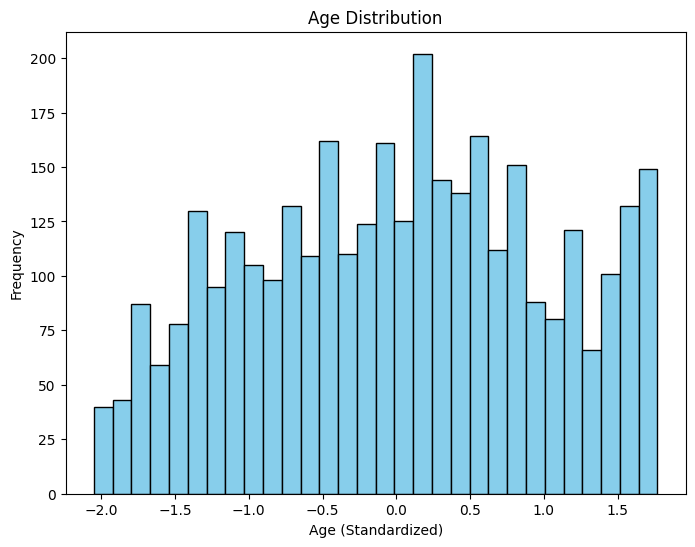

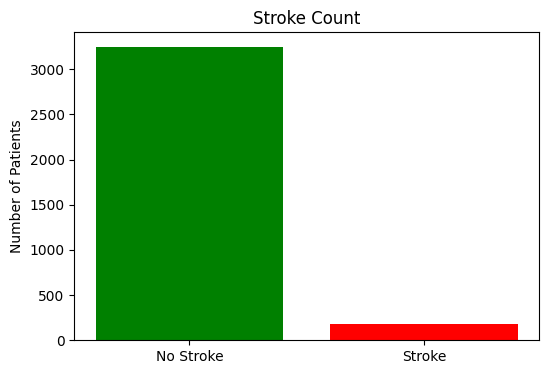


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1625
           1       0.19      0.32      0.24        88

    accuracy                           0.90      1713
   macro avg       0.58      0.62      0.59      1713
weighted avg       0.92      0.90      0.91      1713



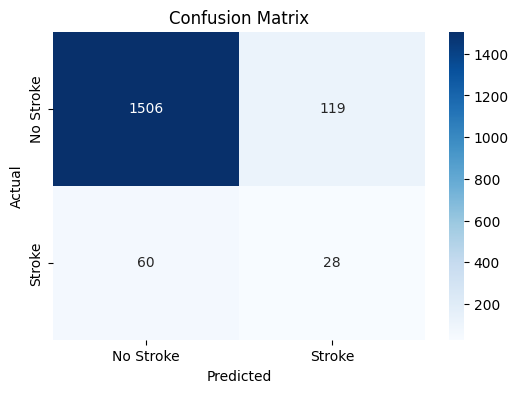

                           Feature  Coefficient
10              work_type_Govt_job    -4.442019
17  smoking_status_formerly smoked    -3.958887
18     smoking_status_never smoked    -3.879774
19           smoking_status_smokes    -3.795395
16            Residence_type_Urban    -3.781529
8                  ever_married_No    -3.742979
5                    gender_Female    -3.647933
13         work_type_Self-employed    -3.574176
6                      gender_Male    -3.571550
15            Residence_type_Rural    -3.447327
9                 ever_married_Yes    -3.173832
12               work_type_Private    -3.159667
0                              age     1.379392
14              work_type_children    -1.327939
2                    heart_disease    -0.926343
11          work_type_Never_worked    -0.516495
1                     hypertension    -0.282724
4                              bmi     0.100251
3                avg_glucose_level     0.073192
7                     gender_Other     0

In [75]:
# --- import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1) id: unique identifier
# 2) gender: "Male", "Female" or "Other"
# 3) age: age of the patient 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 6) ever_married: "No" or "Yes" 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" 8) Residence_type: "Rural" or "Urban" 9) avg_glucose_level: average glucose level in blood 10) bmi: body mass index 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* 12) stroke: 1 if the patient had a stroke or 0 if not *Note: "Unknown" in smoking_status means that the information is unavailable for this patient
# 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 
# 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
# 6) ever_married: "No" or "Yes" 
# 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" 
# 8) Residence_type: "Rural" or "Urban" 
# 9) avg_glucose_level: average glucose level in blood 
# 10) bmi: body mass index 
# 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* 
# 12) stroke: 1 if the patient had a stroke or 0 if not 
# *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Acknowledgements
# (Confidential Source) - Use only for educational purposes If you use this dataset in your research, please credit the author.


# ---------------------------------------------------------------------------------------------

# --- Step 1: Load CSV into data frame -------------------------------------------------------------------
# Read raw csv file from github
github_url = 'https://raw.githubusercontent.com/Zach-Trani/capstone/refs/heads/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(github_url)

# Dataframe information
# print(f"Initial Data Frame:")
# df.info()
# print(f"/n")
# View amount of null entries
# df.isnull().sum()

# --- Step 2: Print initial data shape -------------------------------------------------------------------
# Initial CSV data frame shape
rows_before = df.shape[0]
cols_before = df.shape[1]
total_cells_before = rows_before * cols_before
print(f"Before filtering:")
print(f" - Number of rows: {rows_before}")
print(f" - Number of columns: {cols_before}")
print(f" - Total number of cells: {total_cells_before}")


# --- Step 3: Drop entries with 'bmi' column NaN values -------------------------------------------------------------------
print(f"\nDropping Entries:")

# Count the number of 'NAN' entries in 'bmi' before filtering
nan_before = df['bmi'].isna().sum()
print(f"Number of NaN entries in 'bmi' before filtering: {nan_before}")

# Drop null entries
df_cleaned = df.dropna()

# Count the number of 'NAN' entries in 'bmi' after filtering
nan_after = df_cleaned['bmi'].isna().sum()
print(f"Number of NaN entries in 'bmi' after filtering: {df_cleaned['bmi'].isna().sum()}")


# --- Step 4: Drop entries with 'smoking_status' column Unknown values -------------------------------------------------------------------

# Count the number of 'Unknown' entries in 'smoking_status' before filtering
unknown_before = df['smoking_status'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' smoking_status entries before filtering: {unknown_before}")

# Drop unknown smoking status as we consider it an incomplete entry
df_cleaned = df_cleaned[df_cleaned['smoking_status'] != 'Unknown']

# Count the number of 'Unknown' entries in 'smoking_status' after filtering
unknown_after = df_cleaned['smoking_status'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' smoking_status entries after filtering: {unknown_after}")

# --- Step 5: Drop 'id' column --------------------------------------------------------------------------------------------------------------
df_cleaned = df_cleaned.drop('id', axis=1)
print(f"\n Dropping id column")

# --- Step 6: TRANSFORMED DATA SHAPE ----------------------------------------------------------------
rows_after = df_cleaned.shape[0]
cols_after = df_cleaned.shape[1]
total_cells_after = rows_after * cols_after
print(f"\nAfter filtering:")
print(f" - Number of rows: {rows_after}")
print(f" - Number of columns: {cols_after}")
print(f" - Total number of cells: {total_cells_after}")

# --- Step 7: Implement One-Hot Encoding ----------------------------------------------------------------

# Store categorical columns 
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Perform One-Hot Encoding on categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=False)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

# --- Step 8: TO REMOVE SCALING COMMENT OUT (MODEL WILL BE LESS ACCURATE FROM HERE -----------------------------------
# Initialize the scaler
scaler = StandardScaler()

# Identify numerical (not to be confused with binary) columns to scale
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
# --- TO HERE ---------------------------------------------------------------------------------------------------------

# --- Step 9: Convert boolean type data to binary----------------------------------------------------------------------
# First select all columns of data type boolean
bool_cols = df_encoded.select_dtypes(include=['bool']).columns

# Then convert them to type integer
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Display the first few rows to verify scaling
df_encoded.head()

# --- Step 10: Visual Plotting ------------------------------------------------------------------------------------------
# Plot histogram of age distribution
plt.figure(figsize=(8,6))
plt.hist(df_encoded['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age (Standardized)')
plt.ylabel('Frequency')
plt.show()

# Plot bar chart of stroke counts
stroke_counts = df_encoded['stroke'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(['No Stroke', 'Stroke'], stroke_counts, color=['green', 'red'])
plt.title('Stroke Count')
plt.ylabel('Number of Patients')
plt.show()

# --- Step 11: Modeling -----------------------------------------------------------------------------------------------------
# Define feature matrix X and target vector y
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# --- Step 12: Adjustments to Logistic Regression Model: Oversampled the minority class using SMOTE ---------------------------------


# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model on resampled data
logreg.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Step 13 Plot Logisitic Regression Model Predictions -----------------------------------------------------------------------------------------------------

# Plot + compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Matrix labels
class_names = ['No Stroke', 'Stroke']

# Create confusion matrix with Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# --- Extract coefficients -----------------------------------------------------------------------------------------------------
coefficients = logreg.coef_[0]

# Show in data frame
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Order coefficients by abs value for most influential - good or bad
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False).drop('abs_coef', axis=1)

# Display coefficients
print(coef_df)

